# Load and Prepare Data
Load the CSV file using pandas, prepare features (X) and target (y), and split the data into training and testing sets.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
data = pd.read_csv('../Outputs/pop_sea_temp_fleet_amazon_oil.csv')

# Define columns to drop
columns_to_drop = ['Unnamed: 0', 'popChangePercent', 'oilProductionInTWh', 'GMSL']

# Prepare features (X) and target (y)
X = data.drop(columns=columns_to_drop)
y = data['GMSL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify remaining columns
print("Remaining features:", X.columns.tolist())

Remaining features: ['year', 'pop', 'avgtemp', 'barrelsEquivalent', 'motorizedMerchantShipsOver100T', 'annualLoss']


# Random Forest Model
Create and train a RandomForestRegressor, evaluate its performance using metrics like R2 score and MSE.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Remove year from features
X_no_year = X_train.drop(columns=['year'])
X_test_no_year = X_test.drop(columns=['year'])

# Create and train the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_no_year, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_no_year)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Random Forest Model - Mean Squared Error: {mse_rf}")
print(f"Random Forest Model - R2 Score: {r2_rf}")

# Print feature importance
for feature, importance in zip(X_no_year.columns, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Random Forest Model - Mean Squared Error: 64.35332347448312
Random Forest Model - R2 Score: 0.9846102291150505
pop: 0.3737
avgtemp: 0.0090
barrelsEquivalent: 0.2818
motorizedMerchantShipsOver100T: 0.2849
annualLoss: 0.0506


# Linear Regression Model
Implement linear regression using sklearn, evaluate model performance and analyze coefficients.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_year)
X_test_scaled = scaler.transform(X_test_no_year)

# Create and train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Print coefficients with more decimals
print("\nFeature Coefficients:")
for feature, coef in zip(X_train_no_year.columns, lr_model.coef_):
    print(f"{feature}: {coef:.10f}")

# Statsmodels summary with scaled features
X_train_sm = sm.add_constant(X_train_scaled)
lr_model_sm = sm.OLS(y_train, X_train_sm).fit()
print("\nDetailed Model Summary:")
print(lr_model_sm.summary())


Feature Coefficients:
pop: -6.7647776576
avgtemp: 3.7142297977
barrelsEquivalent: 20.6774352242
motorizedMerchantShipsOver100T: 56.1336443758
annualLoss: -10.6753325074

Detailed Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   GMSL   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     494.4
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           3.28e-72
Time:                        00:13:44   Log-Likelihood:                -455.08
No. Observations:                 113   AIC:                             922.2
Df Residuals:                     107   BIC:                             938.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
               

# Logistic Regression Model
Transform the problem for logistic regression, train the model, and evaluate its performance.

Logistic Regression Model - Accuracy: 0.9655172413793104

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.92      0.96        13

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29



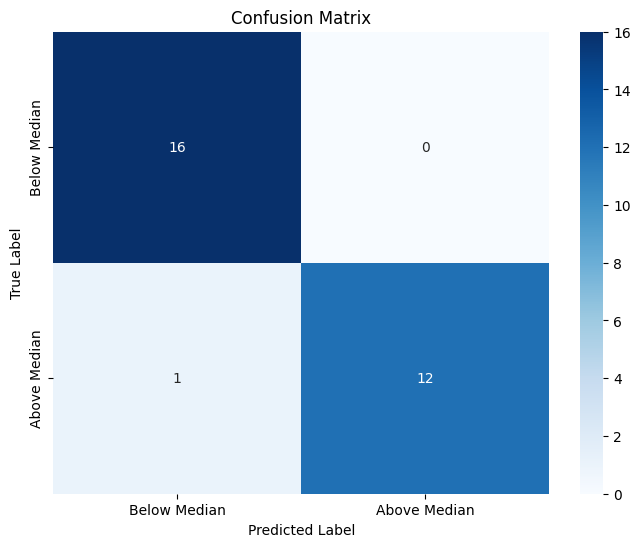


Feature Coefficients:
pop: 1.8803
avgtemp: 0.6539
barrelsEquivalent: 2.2631
motorizedMerchantShipsOver100T: 1.3362
annualLoss: 0.0796


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Remove year from features
X_train_no_year = X_train.drop(columns=['year'])
X_test_no_year = X_test.drop(columns=['year'])

# Transform target variable
median_gmsl = y.median()
y_binary = (y > median_gmsl).astype(int)
y_train_binary = (y_train > median_gmsl).astype(int)
y_test_binary = (y_test > median_gmsl).astype(int)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_year)
X_test_scaled = scaler.transform(X_test_no_year)

# Train logistic regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train_binary)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate model
accuracy_log_reg = accuracy_score(y_test_binary, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test_binary, y_pred_log_reg)
class_report_log_reg = classification_report(y_test_binary, y_pred_log_reg)

# Print metrics
print(f"Logistic Regression Model - Accuracy: {accuracy_log_reg}")
print("\nClassification Report:")
print(class_report_log_reg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median', 'Above Median'],
            yticklabels=['Below Median', 'Above Median'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print feature importance
print("\nFeature Coefficients:")
for feature, coef in zip(X_train_no_year.columns, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Logistic Regression Model Classifier
Transform the problem for logistic regression, train the model, and evaluate its performance at classifying the GSML prediction as above or below the linear regression line.


Logistic Regression Model - Accuracy: 0.5517

Feature Coefficients:
pop: 1.4204
avgtemp: 0.2337
barrelsEquivalent: -0.0653
motorizedMerchantShipsOver100T: -1.6856
annualLoss: 0.5093


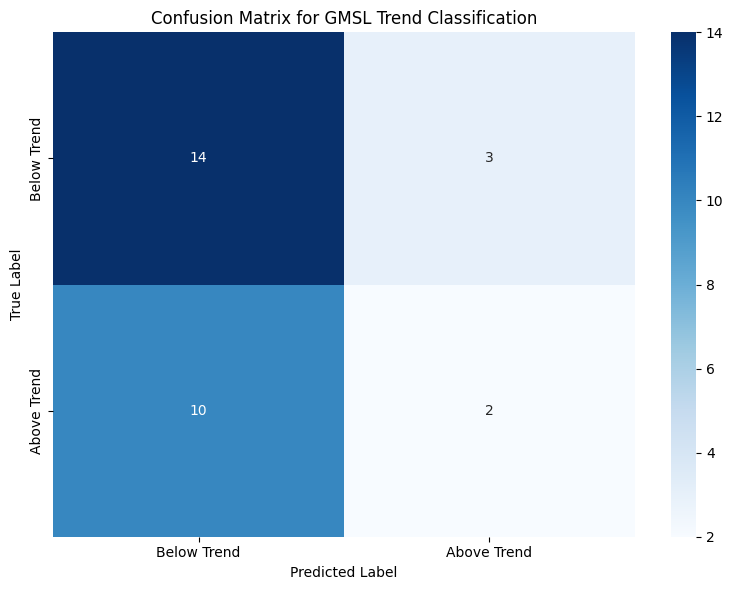

In [8]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create trendline using years as X and GMSL as y
years = data['year'].values.reshape(-1, 1)
gmsl_values = data['GMSL'].values

# Fit linear trend
trend_model = LinearRegression()
trend_model.fit(years, gmsl_values)
expected_gmsl = trend_model.predict(years)

# Create binary target
y_binary = (gmsl_values > expected_gmsl).astype(int)

# Remove year from features
X_train_no_year = X_train.drop(columns=['year'])
X_test_no_year = X_test.drop(columns=['year'])

# Create binary targets for split data
y_train_binary = (y_train > trend_model.predict(data.loc[y_train.index, 'year'].values.reshape(-1,1))).astype(int)
y_test_binary = (y_test > trend_model.predict(data.loc[y_test.index, 'year'].values.reshape(-1,1))).astype(int)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_no_year)
X_test_scaled = scaler.transform(X_test_no_year)

# Train and predict
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train_binary)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Calculate metrics
accuracy_log_reg = accuracy_score(y_test_binary, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test_binary, y_pred_log_reg)

# Print metrics and feature importance
print(f"Logistic Regression Model - Accuracy: {accuracy_log_reg:.4f}")
print("\nFeature Coefficients:")
for feature, coef in zip(X_train_no_year.columns, log_reg_model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Trend', 'Above Trend'],
            yticklabels=['Below Trend', 'Above Trend'])
plt.title('Confusion Matrix for GMSL Trend Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Future Predictions
Generate trend-based feature values for 2022-2030 and use all models to predict future GMSL values.

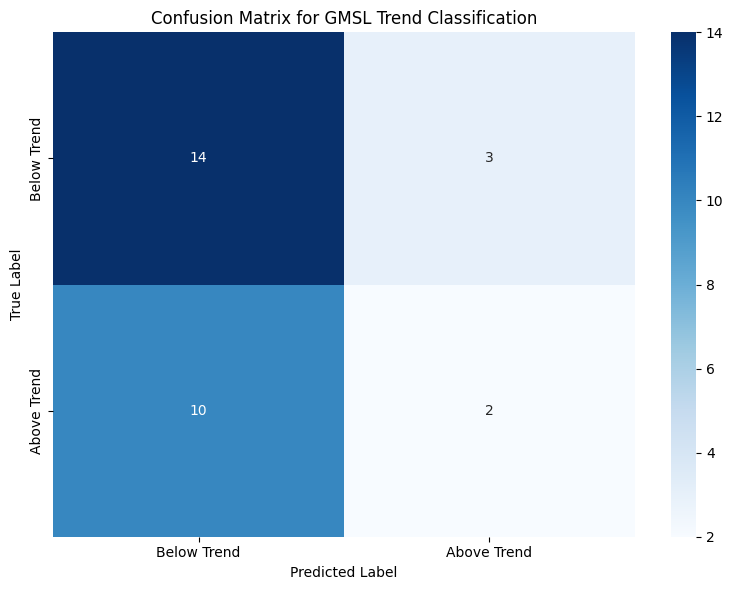


Model comparison has been saved to ./model_comparison.txt

Predictions for 2022-2030:
   year           pop    avgtemp  barrelsEquivalent  \
0  2022  7.955341e+09  14.757305       1.783354e+10   
1  2023  8.001387e+09  14.764610       1.795913e+10   
2  2024  8.047433e+09  14.771915       1.808472e+10   
3  2025  8.093479e+09  14.779220       1.821031e+10   
4  2026  8.139525e+09  14.786525       1.833590e+10   
5  2027  8.185571e+09  14.793830       1.846148e+10   
6  2028  8.231617e+09  14.801135       1.858707e+10   
7  2029  8.277663e+09  14.808440       1.871266e+10   
8  2030  8.323709e+09  14.815745       1.883825e+10   

   motorizedMerchantShipsOver100T    annualLoss  RF_Prediction  LR_Prediction  \
0                    98317.375887  10550.297872       55.04396      66.066422   
1                    99009.751773  10624.595745       55.06530      67.625174   
2                    99702.127660  10698.893617       55.06530      69.183926   
3                   100394.503546  107

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data
data = pd.read_csv('../Outputs/pop_sea_temp_fleet_amazon_oil.csv')

# Define columns to exclude from features
exclude_columns = ['GMSL', 'year', 'Unnamed: 0', 'popChangePercent', 'oilProductionInTWh']

# Prepare features (X) and target (y)
X = data.drop(columns=exclude_columns)
y = data['GMSL']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Create trendline for classification
years = data['year'].values.reshape(-1, 1)
gmsl_values = data['GMSL'].values
trend_model = LinearRegression()
trend_model.fit(years, gmsl_values)
trend_line = trend_model.predict(years)

# Create binary targets
y_binary = (gmsl_values > trend_line).astype(int)
y_train_binary = (y_train > trend_model.predict(data.loc[y_train.index, 'year'].values.reshape(-1,1))).astype(int)
y_test_binary = (y_test > trend_model.predict(data.loc[y_test.index, 'year'].values.reshape(-1,1))).astype(int)

# Scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train_binary)
log_pred = log_model.predict(X_test_scaled)

# Create future predictions dataframe
future_years = pd.DataFrame()
future_years['year'] = range(2022, 2031)

# Extrapolate feature values for remaining columns
for column in X.columns:
    yearly_change = data[column].diff().mean()
    last_value = data[column].iloc[-1]
    future_values = [last_value + (i * yearly_change) for i in range(1, 10)]
    future_years[column] = future_values

# Prepare future data
future_X = future_years[X.columns]
future_X_scaled = scaler.transform(future_X)

# Make future predictions
future_years['RF_Prediction'] = rf_model.predict(future_X)
future_years['LR_Prediction'] = lr_model.predict(future_X)
future_years['Above_Trend'] = log_model.predict(future_X_scaled)

# Calculate metrics
metrics = pd.DataFrame({
    'Random Forest': {
        'R2 Score': r2_score(y_test, rf_pred),
        'MSE': mean_squared_error(y_test, rf_pred),
        'MAE': mean_absolute_error(y_test, rf_pred),
        'Feature Importance': dict(zip(X.columns, rf_model.feature_importances_))
    },
    'Linear Regression': {
        'R2 Score': r2_score(y_test, lr_pred),
        'MSE': mean_squared_error(y_test, lr_pred),
        'MAE': mean_absolute_error(y_test, lr_pred),
        'Coefficients': dict(zip(X.columns, lr_model.coef_))
    },
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test_binary, log_pred),
        'Feature Coefficients': dict(zip(X.columns, log_model.coef_[0])),
        'Classification Report': classification_report(y_test_binary, log_pred)
    }
})

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test_binary, log_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Trend', 'Above Trend'],
            yticklabels=['Below Trend', 'Above Trend'])
plt.title('Confusion Matrix for GMSL Trend Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Save metrics to file
with open('./model_comparison.txt', 'w') as f:
    f.write("Model Comparison Results\n")
    f.write("=======================\n\n")
    
    for model in metrics.columns:
        f.write(f"{model}\n")
        f.write("-" * len(model) + "\n")
        for metric, value in metrics[model].items():
            f.write(f"{metric}:\n")
            if isinstance(value, dict):
                for k, v in value.items():
                    f.write(f"  {k}: {v:.4f}\n")
            elif isinstance(value, str):
                f.write(f"{value}\n")
            else:
                f.write(f"{value:.4f}\n")
        f.write("\n")

print("\nModel comparison has been saved to ./model_comparison.txt")
print("\nPredictions for 2022-2030:")
print(future_years)

# Future Predictions (Long Range to 2100)
Generate trend-based feature values for 2022-2100 and use all models to predict future GMSL values.

In [18]:
# Create extended future predictions dataframe
long_term_future = pd.DataFrame()
long_term_future['year'] = range(2022, 2101)

# Extrapolate feature values
for column in X.columns:
    yearly_change = data[column].diff().mean()
    last_value = data[column].iloc[-1]
    future_values = [last_value + (i * yearly_change) for i in range(1, 80)]
    long_term_future[column] = future_values

# Prepare future data
future_X_long = long_term_future[X.columns]
future_X_scaled_long = scaler.transform(future_X_long)

# Make predictions
long_term_future['RF_Prediction'] = rf_model.predict(future_X_long)
long_term_future['LR_Prediction'] = lr_model.predict(future_X_long)

# Classify based on comparison to linear regression prediction
long_term_future['Above_LR_Trend'] = (long_term_future['RF_Prediction'] > long_term_future['LR_Prediction']).astype(int)

# Create output directory if it doesn't exist
os.makedirs('./Model_Outputs', exist_ok=True)

# Save predictions to file
with open('./longTermPrediction.txt', 'w') as f:
    f.write("Long-Term GMSL and Population Predictions (2022-2100)\n")
    f.write("=============================================\n\n")
    f.write("Year | Population (billions) | RF GMSL (mm) | LR GMSL (mm) | Trend\n")
    f.write("-" * 70 + "\n")
    
    for _, row in long_term_future.iterrows():
        f.write(f"{int(row['year'])} | {row['pop']/1e9:18.2f} | {row['RF_Prediction']:11.2f} | "
                f"{row['LR_Prediction']:11.2f} | {'Above' if row['Above_LR_Trend'] else 'Below'}\n")
    
    # Add summary statistics
    f.write("\nSummary Statistics:\n")
    f.write("=================\n")
    f.write(f"Population in 2100: {long_term_future['pop'].iloc[-1]/1e9:.2f} billion\n")
    f.write(f"Average RF GMSL Prediction: {long_term_future['RF_Prediction'].mean():.2f} mm\n")
    f.write(f"Average LR GMSL Prediction: {long_term_future['LR_Prediction'].mean():.2f} mm\n")
    f.write(f"Years Above Trend: {long_term_future['Above_LR_Trend'].sum()}\n")
    f.write(f"Years Below Trend: {len(long_term_future) - long_term_future['Above_LR_Trend'].sum()}\n")
    
    # Add final year predictions
    f.write("\nPredicted GMSL Change by 2100:\n")
    f.write("============================\n")
    f.write(f"Random Forest Model: {long_term_future['RF_Prediction'].iloc[-1]:.2f} mm\n")
    f.write(f"Linear Regression Model: {long_term_future['LR_Prediction'].iloc[-1]:.2f} mm\n")

print("\nLong-term predictions have been saved to ./longTermPrediction.txt")


Long-term predictions have been saved to ./longTermPrediction.txt
